In [10]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

clean data 

In [11]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_19560/2211222545.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)


In [12]:
display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4,10,1,0,1
1,2,89,1,11,1,1,1
2,3,85,1,2,0,0,1
3,4,76,2,10,1,1,1
4,5,76,2,2,1,0,1


We need to check the data for coorelation between variables and the posative outcome that we are trying to predict. This coorelation does not need to be linear but without it a logistic regression model would not be usefull. 

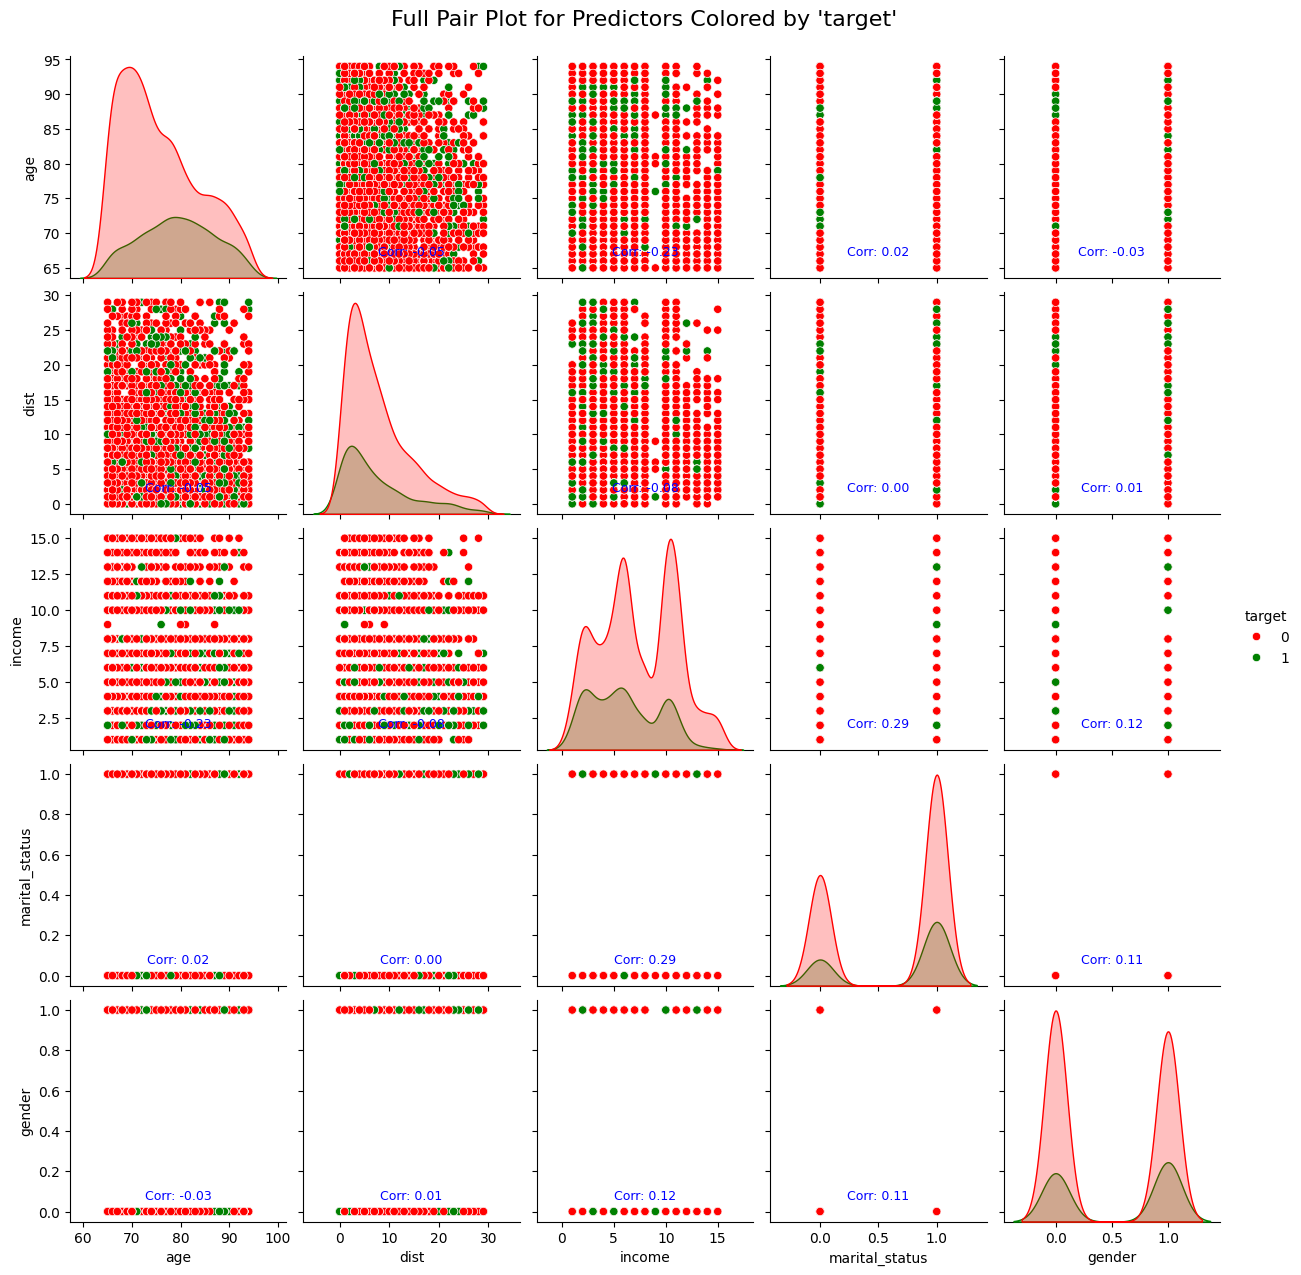

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_full_pairplot_with_corr_binary_target(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a Seaborn pair plot with correlation coefficients annotated on the scatter plots,
    showing a full matrix, and color-coded by a binary target variable.

    Parameters:
    - df: DataFrame containing the data.
    - continuous_vars: List of continuous variable column names.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Filter DataFrame for the required columns
    pairplot_data = df[continuous_vars + [target_var]].copy()
    
    # Ensure the target variable is categorical for coloring
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    
    # Calculate pairwise correlations
    correlation_matrix = pairplot_data[continuous_vars].corr()
    
    # Create the pair plot
    g = sns.pairplot(
        pairplot_data,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        diag_kind='kde',
        corner=False  # Full matrix
    )
    
    # Annotate correlation coefficients
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:  # Skip diagonal
                # Get the current axis
                ax = g.axes[i, j]
                # Get the correlation value
                corr = correlation_matrix.loc[row_var, col_var]
                # Annotate the correlation on the scatter plot
                ax.annotate(
                    f"Corr: {corr:.2f}",
                    xy=(0.5, 0.1),
                    xycoords="axes fraction",
                    ha="center",
                    fontsize=9,
                    color="blue"
                )
    
    # Add a title for context
    plt.suptitle(f"Full Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

# Continuous variables and target variable
continuous_vars = ['age', 'dist', 'income', 'marital_status', 'gender']
target_var = 'target'

# Call the function with the DataFrame
plot_full_pairplot_with_corr_binary_target(data, continuous_vars, target_var, positive_value=1, negative_value=0)

From all of these plots there is no indication of predictor and response relationship between the variables and posative outcomes. 

Across the diagnol you see the density curves of the predictor variable stratified by weither the points that comprise the curve coresponds to posative response outcomes or negative response outcomes. 

For all of the predictors except age, the density curve for the posative outcome is a perfect mirror of the density curve for the negative. What this means is that across the span of that variable, there is no change in the rate of posative outcomes, the only change is in numeracy.

Age appears to be a promising predictor of posative outcome, until you take into account that the population is decreasing and that the ratio of posative outcomes from 80 to 100 is only maintaining and not decreasing. 

evaluate random forest model

then do anamoly detection to see if it caught the pattern that predicts posative outcomes